<a href="https://githubtocolab.com/gee-community/geemap/blob/master/examples/notebooks/112_cartoee_basemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/installing.html#installing) if needed. Keep in mind that cartopy can be challenging to install. If you are unable to install cartopy on your computer, you can try Google Colab with this the [notebook example](https://colab.research.google.com/github/gee-community/geemap/blob/master/examples/notebooks/cartoee_colab.ipynb). 

See below the commands to install cartopy and geemap using conda/mamba:

```
conda create -n gee python=3.9
conda activate gee
conda install mamba -c conda-forge
mamba install cartopy scipy -c conda-forge
mamba install geemap -c conda-forge
```

## Import libraries

In [2]:
%pylab inline

import ee
import geemap

# import the cartoee functionality from geemap
from geemap import cartoee
import cartopy.io.img_tiles as cimgt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Initialize Earth Engine

In [3]:
geemap.ee_initialize()

## Add Earth Engine dataset

In [7]:
import cartopy.feature as cfeat
from cartopy import crs as ccrs, feature as cfeature

In [8]:
import matplotlib.transforms as mtransforms

In [9]:
shpfilename="Data/County.shp"
reader = shpreader.Reader(shpfilename)

NameError: name 'shpreader' is not defined

In [10]:
#for reading shapefiles
import cartopy.io.shapereader as shpreader
shpfilename="Data/County.shp"
reader = shpreader.Reader(shpfilename)
counties = reader.records()
county=next(counties)
#print county attributes
print(sorted(county.attributes.keys()))

['AREA', 'COUNTY', 'COUNTY3_', 'COUNTY3_ID', 'OBJECTID', 'PERIMETER', 'Shape_Area', 'Shape_Leng']


Turkana


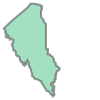

In [11]:
print(county.attributes["COUNTY"])
county.geometry

## Global-scale maps

In [12]:
# get an earth engine image of ocean data for Jan-Mar 2018
ocean = (
    ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')
    .filter(ee.Filter.date('2018-01-01', '2018-03-01'))
    .median()
    .select(["sst"], ["SST"])
)

In [13]:
# get an earth engine image of ocean data for Jan-Mar 2018
gaz = (
    ee.ImageCollection("NASA/GEOS-CF/v1/rpl/tavg1hr")
    .filter(ee.Filter.date('2023-07-27', '2023-07-30'))
    .median()
    .select(["PM25_RH35_GCC"])
)

In [14]:
# get an earth engine image of ocean data for Jan-Mar 2018
rain = (
    ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD')
    .filter(ee.Filter.date('2018-03-27', '2020-03-30'))
    .median()
    .select(["precipitation"])
)

In [15]:
# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands': "PM25_RH35_GCC", 'min':0, 'max': 7}


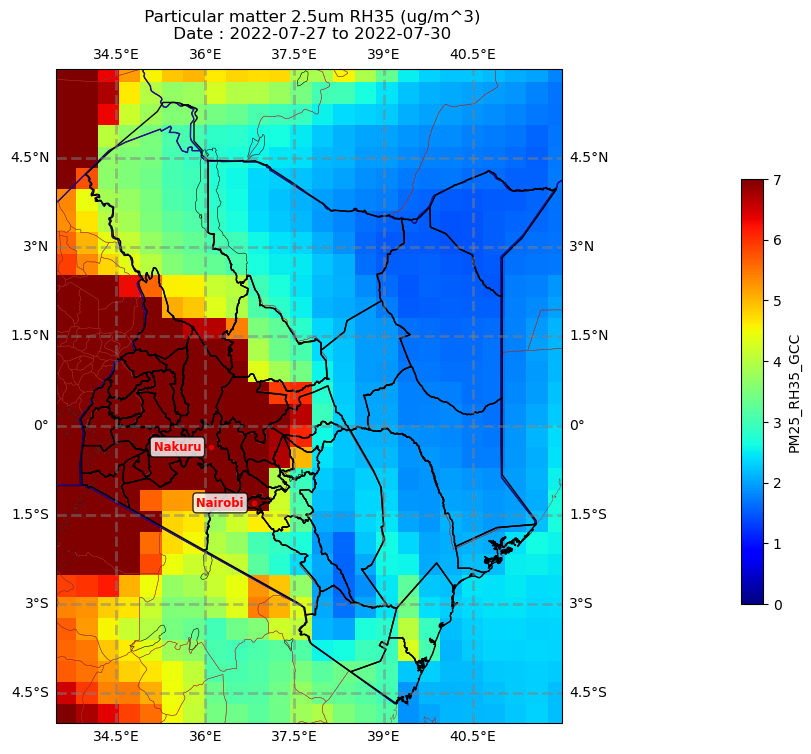

In [18]:
fig = plt.figure(figsize=(11, 8.5))
# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(
    gaz,
    cmap='jet',
    vis_params=visualization,
    projection=ccrs.PlateCarree(),
)
ax.add_feature(cfeature.BORDERS,edgecolor='black')
#ax.add_feature(cfeat.OCEAN)
#ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAKES,facecolor='None',edgecolor='black',linewidth=0.4)
#ax.add_feature(cfeat.LAND)
#ax.coastlines(resolution="110m", color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

#ax1.add_feature(cfeat.RIVERS,facecolors='None')

plt.title(" Particular matter 2.5um RH35 (ug/m^3)\n Date : 2022-07-27 to 2022-07-30",fontsize=12)
plt.plot(
    36.82,
    -1.3,
    marker='o',
    color='red',
    markersize=3,
    alpha=0.7,
    transform=ccrs.PlateCarree(),
)


# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.


plate_transform = ccrs.PlateCarree()._as_mpl_transform(ax)
text_transform = mtransforms.offset_copy(plate_transform, units='dots', x=-10)

plt.text(
    36.82,
    -1.3,
    u'Nairobi',
    verticalalignment='center',
    horizontalalignment='right',
    transform=text_transform,
    fontsize='small',
    fontweight='bold',
    color='red',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'),
)

plt.plot(
    36.1,
    -0.36,
    marker='o',
    color='red',
    markersize=3,
    alpha=0.7,
    transform=ccrs.PlateCarree(),
)

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.

plate_transforms = ccrs.PlateCarree()._as_mpl_transform(ax)
text_transforms = mtransforms.offset_copy(plate_transforms, units='dots', x=-10)

plt.text(
    36.1,
    -0.36,
    u'Nakuru',
    verticalalignment='center',
    horizontalalignment='right',
    transform=text_transforms,
    fontsize='small',
    fontweight='bold',
    color='red',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'),
)


ax.set_extent([33.5,42,-5, 6], crs=ccrs.PlateCarree())


for county in reader.geometries():
    edgecolor='black'
    ax.add_geometries([county], ccrs.PlateCarree(),facecolor='None', edgecolor=edgecolor)

cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap="jet", orientation='vertical')    

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
plt.savefig('bl.jpg',dpi=300)